In [2]:
#imporing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Understanding and preparation

In [4]:
#reading the bikes dataset
bikes= pd.read_csv('day.csv')
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
#shape
bikes.shape

(730, 16)

In [6]:
#info
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking for na or missing values
bikes.isnull().sum() #no null values in the dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<Figure size 1080x1080 with 0 Axes>

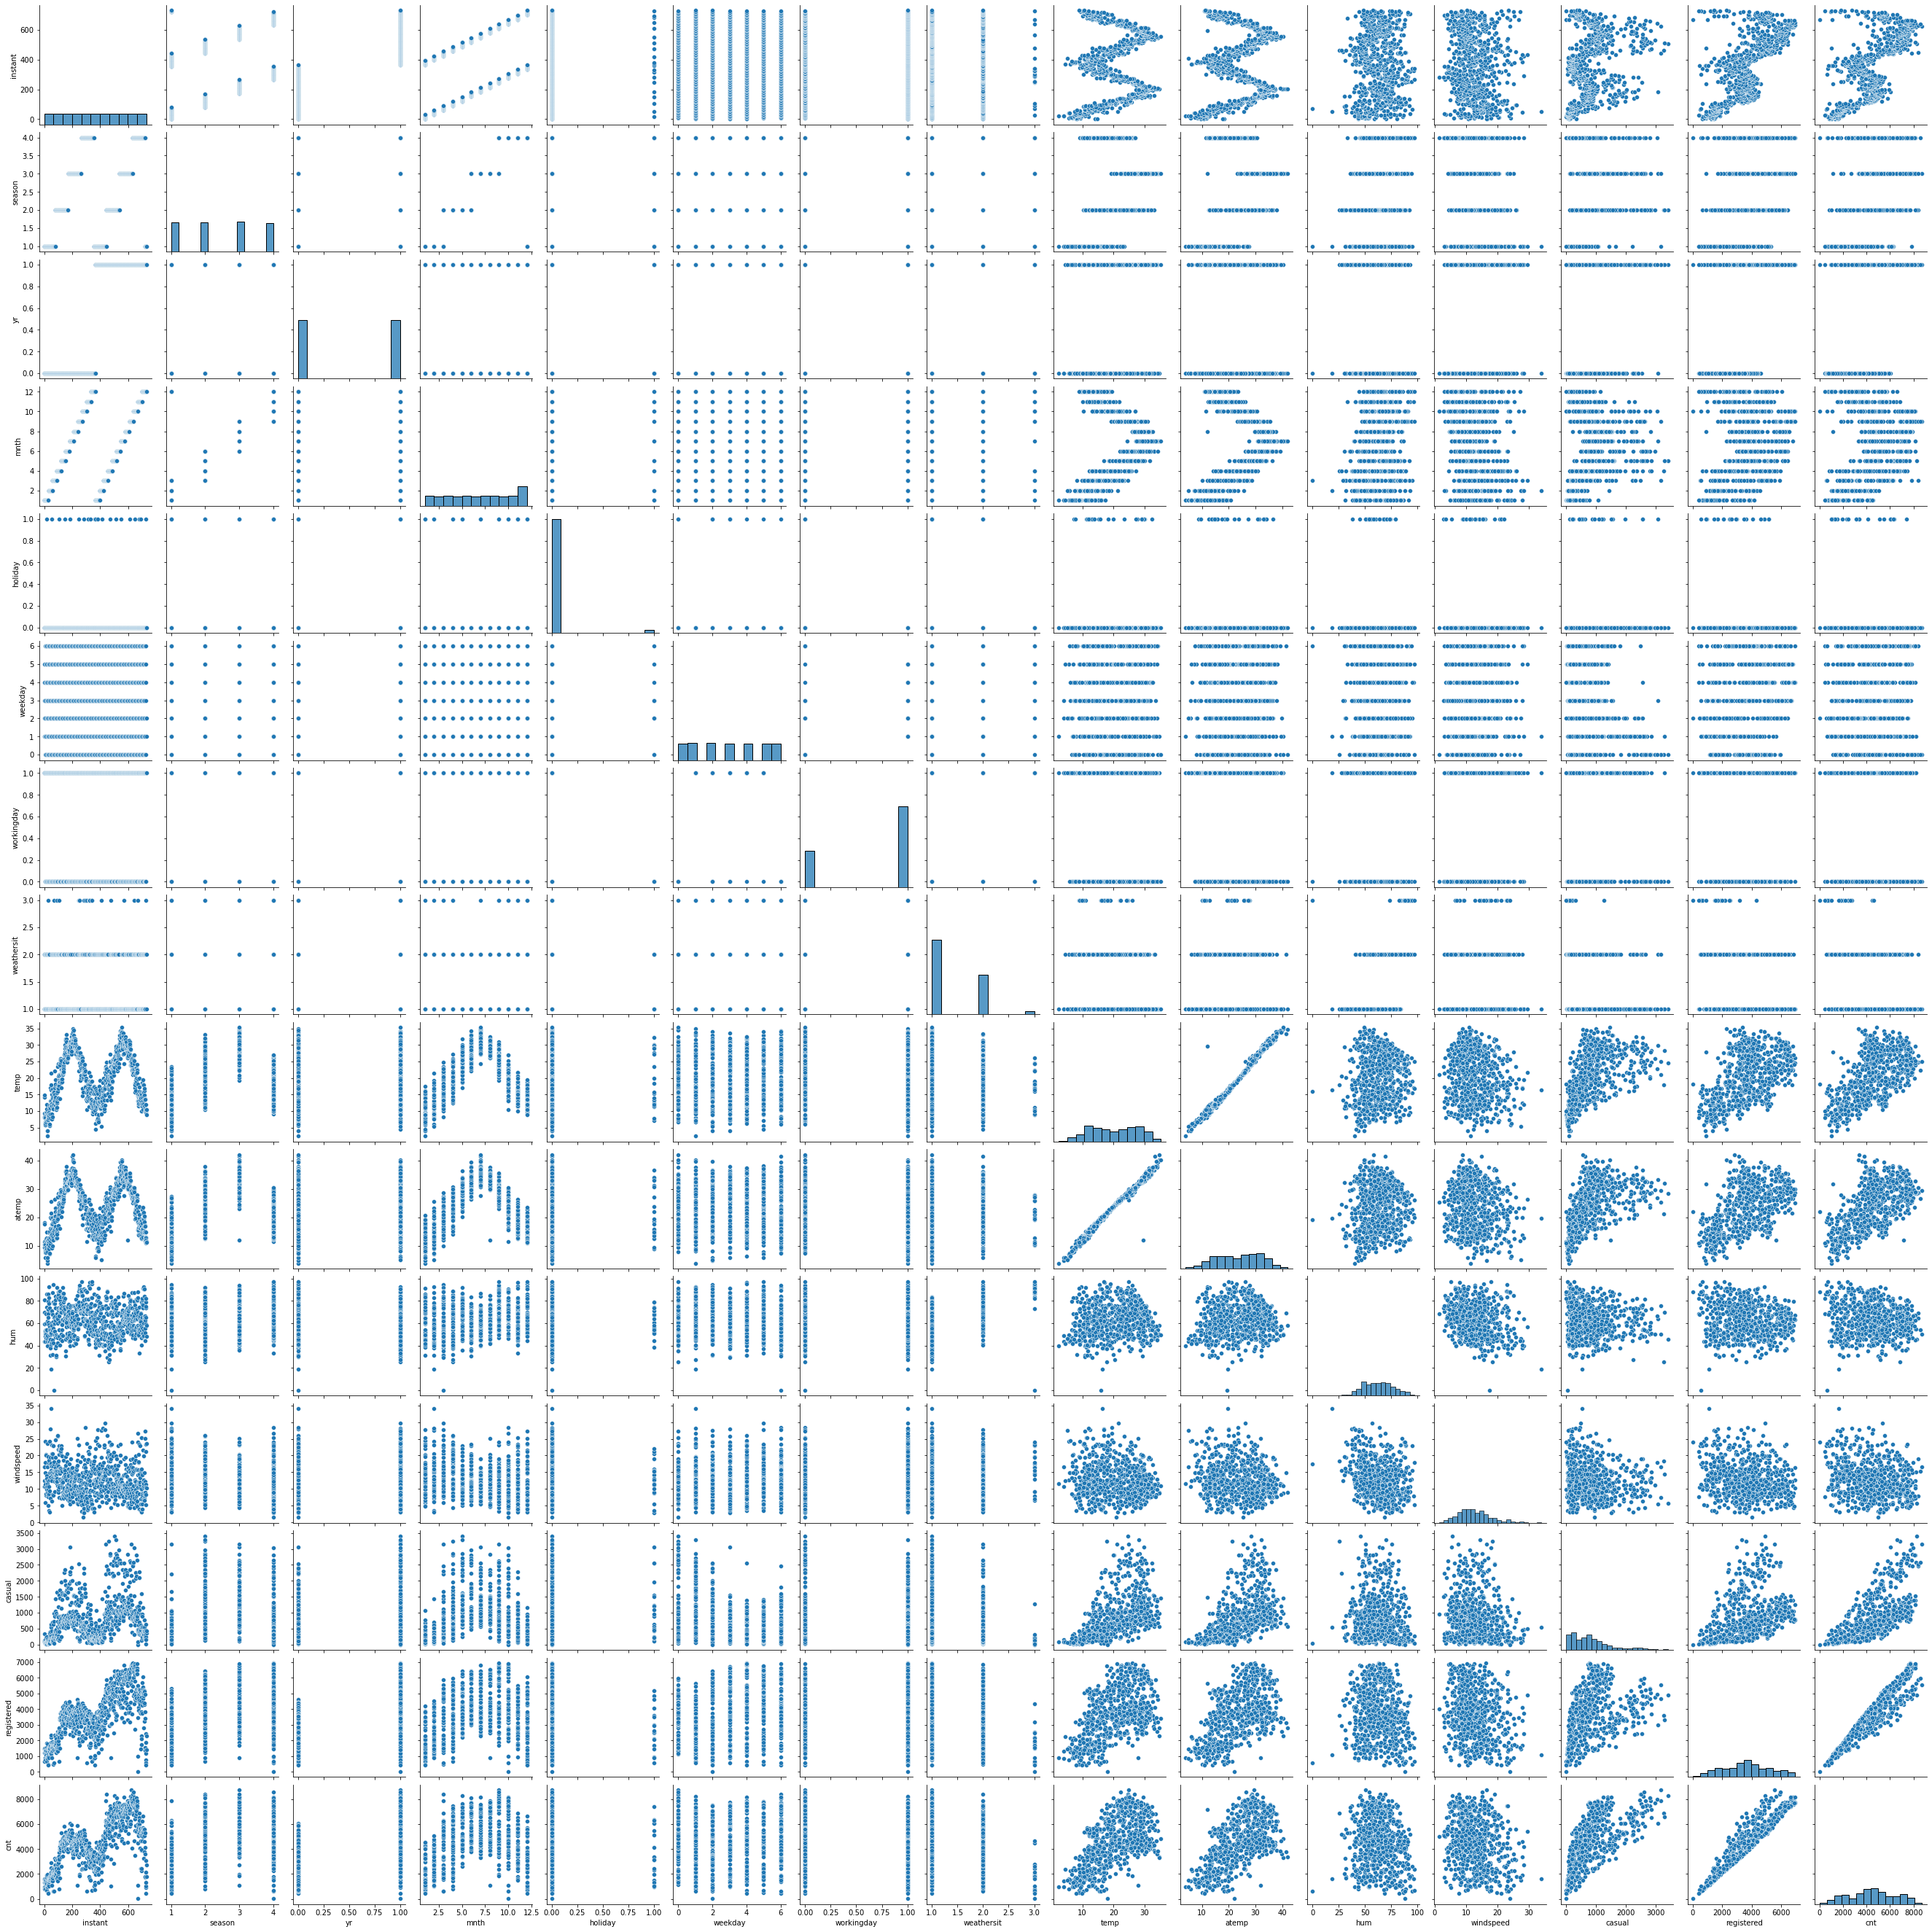

In [8]:
#plotting a pairplot
plt.figure(figsize=(15,15))
sns.pairplot(bikes)

**We can see from above that temp, atemp, casual and registered are all having a linear relationship with the target variable cnt.**

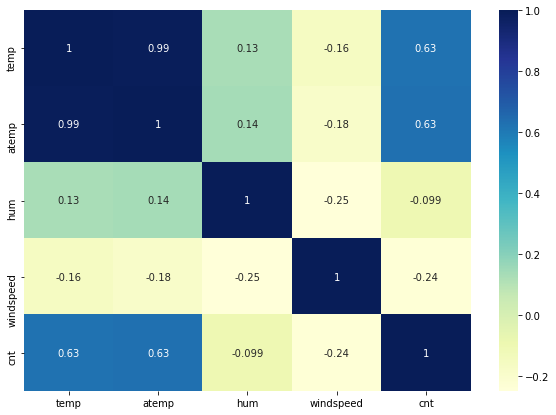

In [74]:
#checking correlation between numeric variables
plt.figure(figsize=(10,7))
sns.heatmap(bikes[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='YlGnBu')
plt.show()

**As we can see temp and atemp are very highly correlated, so they are essentially very similar variables. Hence we will drop atemp from our analysis later on while preparing the data and won't consider it for model building or any EDA analysis**


In [28]:
#columns
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

###  Preparing the data for model building

In [30]:
bikes2= bikes.copy() #copying the bikes dataset into a new variable so as to avoid changing the original dataset
bikes2.shape

(730, 16)

In [31]:
bikes2.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [32]:
#creating functions to relabel the categorical variables
def seasonMod(x):  #this relabels season variable
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

def monthMod(x):     #this relabels mnth
    if x== 1:
        return 'January'
    elif x== 2:
        return 'February'
    elif x==3:
        return 'March'
    elif x==4:
        return 'April'
    elif x==5:
        return 'May'
    elif x==6:
        return 'June'
    elif x==7:
        return 'July'
    elif x==8:
        return 'August'
    elif x==9:
        return 'September'
    elif x==10:
        return 'October'
    elif x==11:
        return 'November'
    elif x==12:
        return 'December'
    
def weekdayMod(x):     #this relabels weekday 
    if x==0:
        return 'Sunday'
    elif x==1:
        return 'Monday'
    elif x==2:
        return 'Tuesday'
    elif x==3:
        return 'Wednesday'
    elif x==4:
        return 'Thursday'
    elif x==5:
        return 'Friday'
    else:
        return 'Saturday'


def weathersitMod(x):  #this relabels weathersitMod 
    if x==1:
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif x==2:
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif x==3:
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'

In [33]:
#applying our functions now to relabel the categorical variables
bikes2['season_relabelled']= bikes2.season.apply(seasonMod)
bikes2['month_relabelled']= bikes2.mnth.apply(monthMod)
bikes2['weekday_relabelled']= bikes2.weekday.apply(weekdayMod)
bikes2['weathersit_relablled']= bikes2.weathersit.apply(weathersitMod)

bikes2.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt season_relabelled month_relabelled weekday_relabelled  \
0   985            spring          January             Monday   
1   801            spring          January            Tuesday   
2  1349            spring          January          Wednesday   
3  1562            spring          January           Thursday   
4  1600            spring          January             Friday   

                                weathersit_relablled  
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  
2    Clear, Few clouds, Partly cloudy, Partly cloudy  
3    Clear, Few clouds, Partly cloudy, Partly cloudy  
4    Clear, Few clouds, Partly cloudy, Partly cloudy

In [34]:
#now that we have relabelled the category variables by creating new columns so we can drop the earliber columns now as we don't need them anymore
#we will drop instant as well as it's just a record index.
bikes2=  bikes2.drop(labels=['instant','dteday','season', 'mnth', 'weekday', 'weathersit'], axis=1)

bikes2.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           1  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt season_relabelled month_relabelled weekday_relabelled  \
0         654   985            spring          January             Monday   
1         670   801            spring          January            Tuesday   
2        1229  1349            spring          January          Wednesday   
3        1454  1562            spring          January           Thursday   
4        1518  1600            spring          January             Friday   

                                weathersit_relablled  
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  
2    Clear, Few clouds, Partly cloudy, Partly cloudy  
3    Clear, Few clouds, Partly cloudy, Partly cloudy  
4    Clear, Few clouds, Partly cloudy, Partly cloudy

In [35]:
bikes_Eda= bikes2.copy()  #copying bikes2 thus far into a fresh dataframe bikes_Eda which we will later use for EDA and visulaisation

In [36]:
#creating dummies for all the categorical variables now
season_dummies= pd.get_dummies(bikes2.season_relabelled)
mnth_dummies= pd.get_dummies(bikes2.month_relabelled)
weekday_dummies= pd.get_dummies(bikes2.weekday_relabelled)
weathersit_dummies= pd.get_dummies(bikes2.weathersit_relablled)



In [37]:
#dropping 'season_relabelled', month_relabelled', 'weekday_relabelled', 'weathersit_relablled' and adding the dummy variables 
#in their place
bikes2= bikes2.drop(['season_relabelled',
       'month_relabelled', 'weekday_relabelled', 'weathersit_relablled'], axis=1)
bikes2.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           1  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

In [38]:
bikes2.shape

(730, 10)

In [39]:
bikes2= pd.concat([bikes2, season_dummies, mnth_dummies, weekday_dummies, weathersit_dummies], axis=1 )
bikes2.shape

(730, 36)

In [40]:
bikes2.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           1  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
0         654   985  ...       0       1         0       0         0        0   
1         670   801  ...       0       0         0       0         0        1   
2        1229  1349  ...       0       0         0       0         0        0   
3        1454  1562  ...       0       0         0       0         1        0   
4        1518  1600  ...       1       0         0       0         0        0   

   Wednesday  Clear, Few clouds, Partly cloudy, Partly cloudy  \
0          0                                                0   
1          0                                                0   
2          1                                                1   
3          0                                                1   
4          0                                                1   

   Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  \
0                                                  0                                         
1                                                  0                                         
2                                                  0                                         
3                                                  0                                         
4                                                  0                                         

   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
0                                                  1             
1                                                  1             
2                                                  0             
3                                                  0             
4                                                  0             

[5 rows x 36 columns]

### Train test split

In [41]:
#shape check
bikes2.shape

(730, 36)

In [42]:
#Let's first drop atemp, registered and casual as these are unnecessary variables
bikes2= bikes2.drop(['atemp', 'registered', 'casual'], axis=1)
bikes2.shape

(730, 33)

In [214]:
#splitting into train and test data
from sklearn.model_selection import train_test_split

dftrain, dftest= train_test_split(bikes2, train_size=0.70, random_state=1000)
print(dftrain.shape)
print(dftest.shape)

(510, 33)
(220, 33)


In [215]:
#Now standardising the numeric variables using min max or normalisation method
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

In [216]:
dftrain.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  fall  \
674   1        0           1  11.514153  56.7083  11.625371  5686     0   
477   1        0           1  13.188347  76.6667  20.334232  3214     0   
176   0        0           1  27.880000  51.3333   6.333731  5305     1   
655   1        0           1  21.422500  72.8333  15.874779  7509     0   
607   1        0           0  31.330847  58.7500  11.291711  7350     1   

     spring  summer  ...  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
674       0       0  ...       0       0         0       0         0        0   
477       0       1  ...       0       0         0       0         0        1   
176       0       0  ...       0       0         0       0         0        1   
655       0       0  ...       1       0         0       0         0        0   
607       0       0  ...       0       0         1       0         0        0   

     Wednesday  Clear, Few clouds, Partly cloudy, Partly cloudy  \
674          1                                                1   
477          0                                                0   
176          0                                                1   
655          0                                                0   
607          0                                                1   

     Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  \
674                                                  0                                         
477                                                  0                                         
176                                                  0                                         
655                                                  0                                         
607                                                  0                                         

     Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
674                                                  0             
477                                                  1             
176                                                  0             
655                                                  1             
607                                                  0             

[5 rows x 33 columns]

In [217]:
#applying normalisation on the numeric variables
num_vars= ['temp', 'hum', 'windspeed']
dftrain[num_vars]= scaler.fit_transform(dftrain[num_vars])
dftrain.head()

yr  holiday  workingday      temp       hum  windspeed   cnt  fall  \
674   1        0           1  0.240884  0.584370   0.311545  5686     0   
477   1        0           1  0.294252  0.790039   0.579511  3214     0   
176   0        0           1  0.762572  0.528982   0.148724  5305     1   
655   1        0           1  0.556729  0.750536   0.442296  7509     0   
607   1        0           0  0.872573  0.605410   0.301278  7350     1   

     spring  summer  ...  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
674       0       0  ...       0       0         0       0         0        0   
477       0       1  ...       0       0         0       0         0        1   
176       0       0  ...       0       0         0       0         0        1   
655       0       0  ...       1       0         0       0         0        0   
607       0       0  ...       0       0         1       0         0        0   

     Wednesday  Clear, Few clouds, Partly cloudy, Partly cloudy  \
674          1                                                1   
477          0                                                0   
176          0                                                1   
655          0                                                0   
607          0                                                1   

     Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  \
674                                                  0                                         
477                                                  0                                         
176                                                  0                                         
655                                                  0                                         
607                                                  0                                         

     Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
674                                                  0             
477                                                  1             
176                                                  0             
655                                                  1             
607                                                  0             

[5 rows x 33 columns]

In [218]:
#checking the columns again
dftrain.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'fall', 'spring', 'summer', 'winter', 'April', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

**Now our dataset is cleaned and ready for further analysis and model building.**

## Step 2: EDA and data visualisation

Note that we separately created a dataframe bikes_Eda specifically for visualisation and performing eda. We will be using this variable
for our EDA purposes in this section


In [219]:
bikes_Eda.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           1  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt season_relabelled month_relabelled weekday_relabelled  \
0         654   985            spring          January             Monday   
1         670   801            spring          January            Tuesday   
2        1229  1349            spring          January          Wednesday   
3        1454  1562            spring          January           Thursday   
4        1518  1600            spring          January             Friday   

                                weathersit_relablled  
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  
2    Clear, Few clouds, Partly cloudy, Partly cloudy  
3    Clear, Few clouds, Partly cloudy, Partly cloudy  
4    Clear, Few clouds, Partly cloudy, Partly cloudy

### Categorical variables

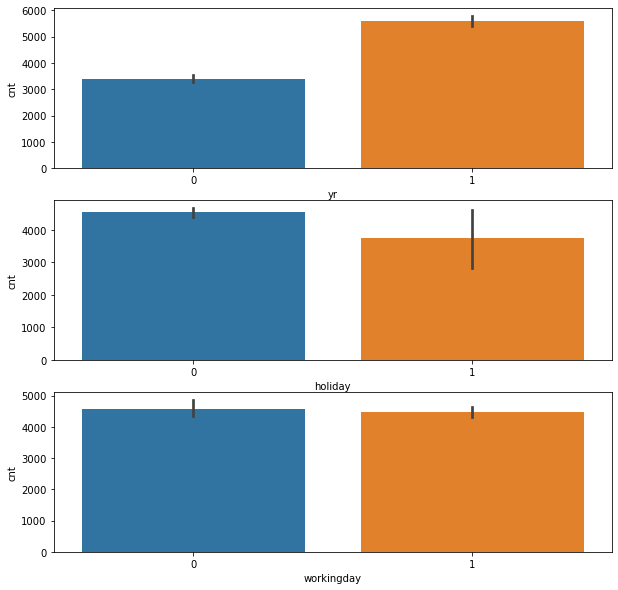

In [326]:
#Exploring categorical variables using bar plots
#year vs target

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.barplot(x= 'yr', y= 'cnt', data= bikes_Eda)

plt.subplot(3,1,2)
sns.barplot(x= 'holiday', y= 'cnt', data= bikes_Eda)

plt.subplot(3,1,3)
sns.barplot(x= 'workingday', y= 'cnt', data= bikes_Eda)

plt.show()

**Insights:** 
1. if the year is 2019, count of total bike rentals or cnt is higher
2. if its a holiday, count of total bike rentals or cnt is lower
3. working day doesn't seem to have any effect on total bike rentals

<AxesSubplot:xlabel='weathersit_relablled', ylabel='cnt'>

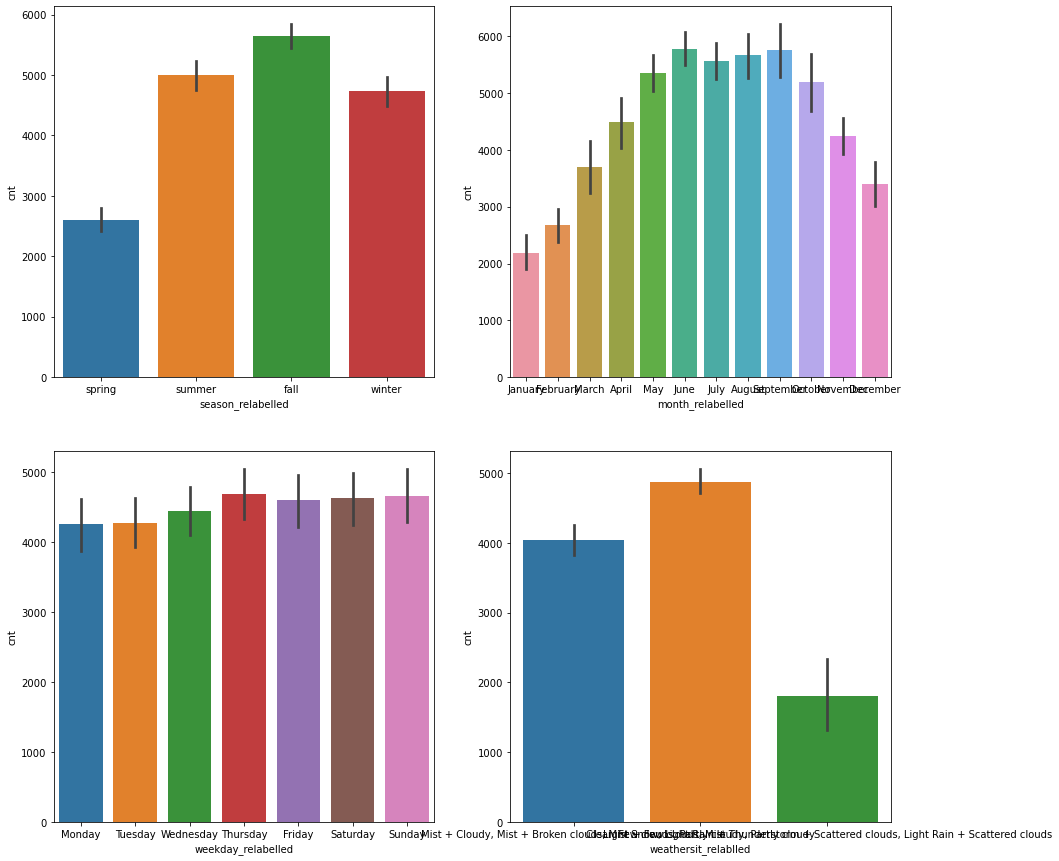

In [220]:
#Exploring categorical variables using bar plots
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.barplot(x= bikes_Eda.season_relabelled, y= bikes_Eda.cnt)

plt.subplot(2,2,2)
sns.barplot(x= bikes_Eda.month_relabelled, y= bikes_Eda.cnt)

plt.subplot(2,2,3)
sns.barplot(x= bikes_Eda.weekday_relabelled, y= bikes_Eda.cnt)

plt.subplot(2,2,4)
sns.barplot(x= bikes_Eda.weathersit_relablled, y= bikes_Eda.cnt)

**Insights:** 
1. count of total rental bikes is highest in the fall season followed by summer and winter. It's the lowest in  spring season
2. count of total rental bikes tends to increase in the months June to September while it's low in the months from January to March.
3. count of total rental bikes is higher on Sundays and Thursdays while it's low on Mondays and Tuesdays.
4. count of total rental bikes is higher on days with clear weather and few clouds followed by misty days or days with broken clouds. Howveer, cnt is low on days with light rain or thunderstorms and scattered clouds
    

### Numerical variables

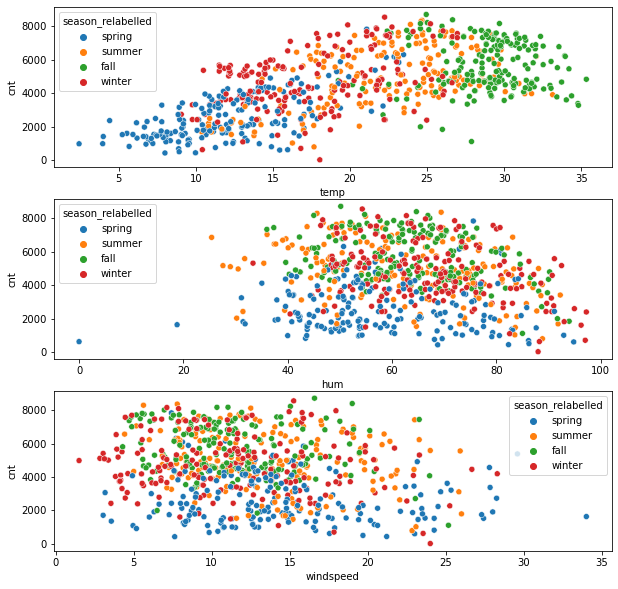

In [221]:
#Numerical variables vs cnt vs season

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.scatterplot(x= bikes_Eda.temp, y= bikes_Eda.cnt, hue= bikes_Eda.season_relabelled)

plt.subplot(3,1,2)
sns.scatterplot(x= bikes_Eda.hum, y= bikes_Eda.cnt, hue= bikes_Eda.season_relabelled)

plt.subplot(3,1,3)
sns.scatterplot(x= bikes_Eda.windspeed, y= bikes_Eda.cnt, hue= bikes_Eda.season_relabelled)

plt.show()

**Insights:** 
1. All the 3 graphs above here seems to follow the seasonal pattern which we established in the previous section i.e. cnt is high in fall, followed by summer and winter and low in spring
2. Temperature seems to have a linear relationship with cnt. With increase in temperature count of total rental bikes (cnt) seems to increase
3. For humidity, we can see the pattern that when humidity is low the datapoints are rare i.e. cnt (total bike rentals) is lower . When humidity is high, there seems to be an increase in the occurence of the data points therefore meaning increase in total bike rentals or cnt.
4. For windspeed, the seasonal pattern is explaining most of the variation in the data i.e. cnt is hight in fall, followed by summer an winter while it's low in spring. We can also see that when windspeed is higher, there are much less data points i.e. bike rentals are lower.

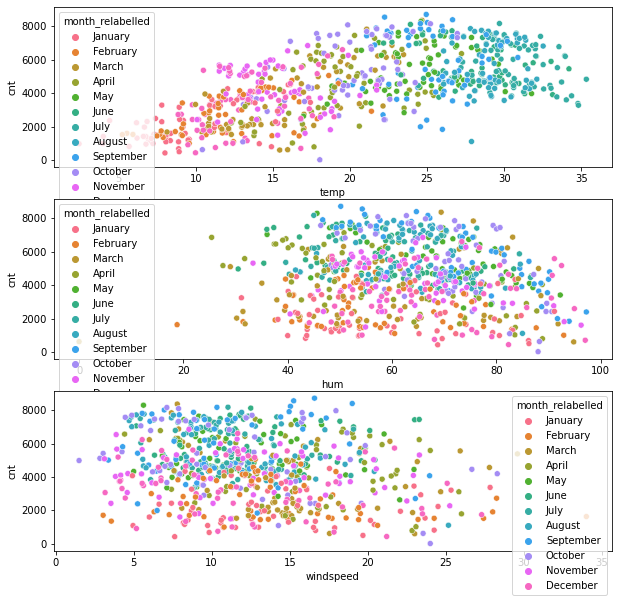

In [222]:
#Numerical variables vs cnt vs month
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.scatterplot(x= bikes_Eda.temp, y= bikes_Eda.cnt, hue= bikes_Eda.month_relabelled)

plt.subplot(3,1,2)
sns.scatterplot(x= bikes_Eda.hum, y= bikes_Eda.cnt, hue= bikes_Eda.month_relabelled)

plt.subplot(3,1,3)
sns.scatterplot(x= bikes_Eda.windspeed, y= bikes_Eda.cnt, hue= bikes_Eda.month_relabelled)

plt.show()

**Insights:**
1. All the 3 graphs show that the monthly pattern we established before explains a lot of the variation in the data for all 3 variables i.e. count of total rental bikes tends to increase in the months June to September while it's low in the months from January to March.
2. Temperature seems to have a linear relationship with cnt. With increase in temperature count of total rental bikes (cnt) seems to increase.
3. For humidity, we can see the pattern that when humidity is low the datapoints are rare i.e. cnt (total bike rentals) is lower . When humidity is high, there seems to be an increase in the occurence of the data points therefore meaning increase in total bike rentals or cnt.
4. For windspeed, the seasonal pattern is explaining most of the variation in the data i.e. cnt is hight in fall, followed by summer an winter while it's low in spring. We can also see that when windspeed is higher, there are much less data points i.e. bike rentals are lower.

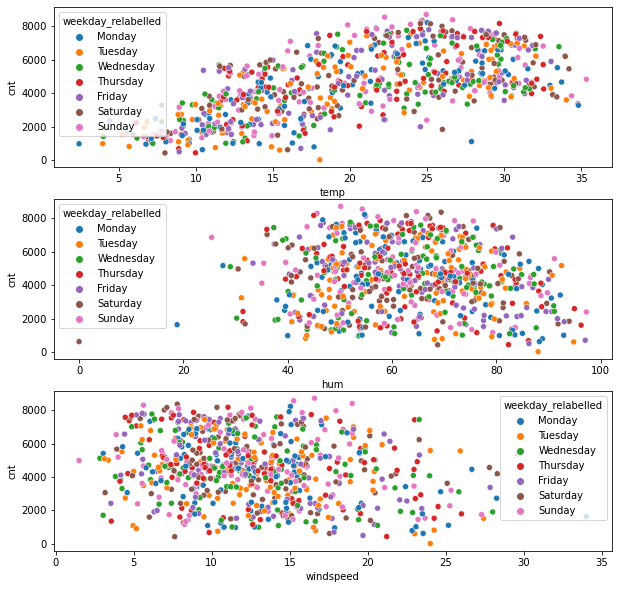

In [223]:
#Numerical variables vs cnt vs weekday

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.scatterplot(x= bikes_Eda.temp, y= bikes_Eda.cnt, hue= bikes_Eda.weekday_relabelled)

plt.subplot(3,1,2)
sns.scatterplot(x= bikes_Eda.hum, y= bikes_Eda.cnt, hue= bikes_Eda.weekday_relabelled)

plt.subplot(3,1,3)
sns.scatterplot(x= bikes_Eda.windspeed, y= bikes_Eda.cnt, hue= bikes_Eda.weekday_relabelled)

plt.show()

**Here the weekdays data isn't able to explain the variation as seen in these graphs**

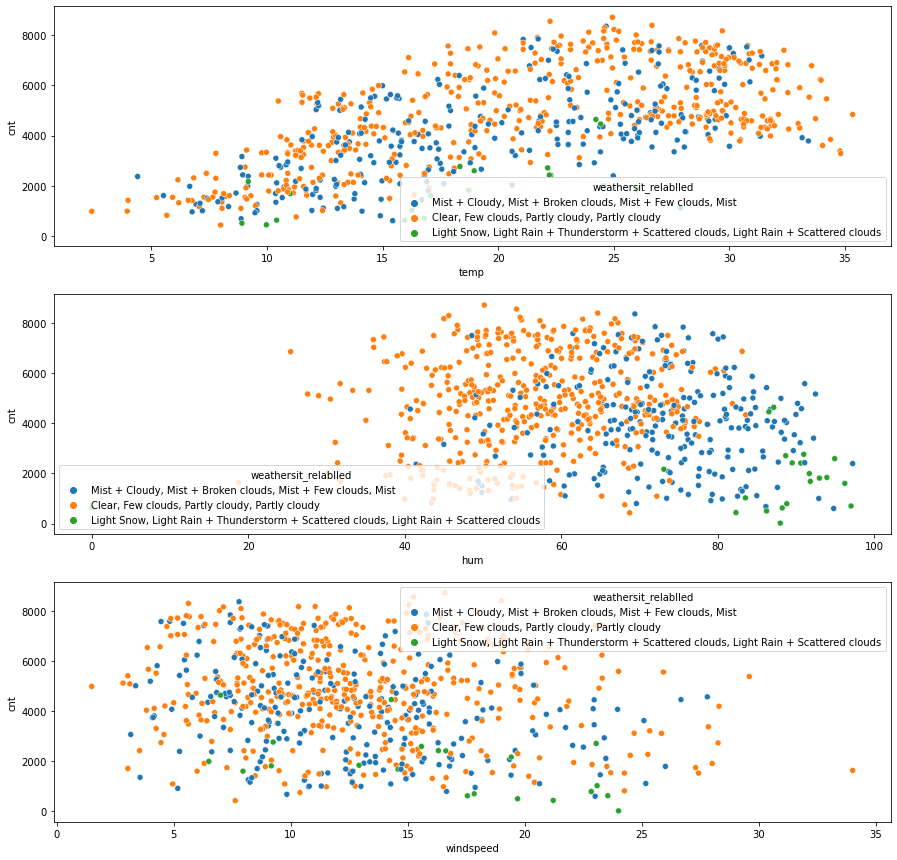

In [224]:
#Numerical variables vs cnt vs weekday

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(x= bikes_Eda.temp, y= bikes_Eda.cnt, hue= bikes_Eda.weathersit_relablled)

plt.subplot(3,1,2)
sns.scatterplot(x= bikes_Eda.hum, y= bikes_Eda.cnt, hue= bikes_Eda.weathersit_relablled)

plt.subplot(3,1,3)
sns.scatterplot(x= bikes_Eda.windspeed, y= bikes_Eda.cnt, hue= bikes_Eda.weathersit_relablled)

plt.show()

**Insights:** Aside from the insights that we already created for temperature, humididy and windspeed, we can also see from these 3 graphs that the insight we established about weathersit earlier getting validated here. 
That is, count of total rental bikes is higher on days with clear weather and few clouds followed by misty days or days with broken clouds. Howveer, cnt is low on days with light rain or thunderstorms and scattered clouds

## Step 3: Model Building

For model building we will use a mixed approach which is a combination of using RFE (Recursive Feature elimination) along with manual feature selection/elimination

#### splitting into x and y sets for model building

In [225]:
#checking shape of train set
dftrain.shape

(510, 33)

In [226]:
#splitting into x and y sets for model building
ytrain= dftrain.pop('cnt')
xtrain= dftrain

In [227]:
#shape check
print(xtrain.shape)
print(ytrain.shape)

(510, 32)
(510,)


### 1. Using RFE

In [228]:
#Importing RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [229]:
#using RFE

bikelm= LinearRegression()
bikelm_fit= bikelm.fit(xtrain, ytrain)

rfe= RFE(bikelm_fit, 15)   #we are selecting the top 15 features
rfe= rfe.fit(xtrain, ytrain)

In [230]:
list(zip(dftrain.columns, rfe.support_, rfe.ranking_))

[('yr', False, 14),
 ('holiday', False, 17),
 ('workingday', False, 18),
 ('temp', False, 13),
 ('hum', False, 15),
 ('windspeed', False, 16),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('April', False, 3),
 ('August', True, 1),
 ('December', False, 8),
 ('February', False, 6),
 ('January', False, 9),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 4),
 ('May', True, 1),
 ('November', False, 7),
 ('October', False, 5),
 ('September', False, 2),
 ('Friday', True, 1),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Clear, Few clouds, Partly cloudy, Partly cloudy', False, 10),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  False,
  12),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', False, 11)]

In [231]:
top15_features= dftrain.columns[rfe.support_]
top15_features

Index(['fall', 'spring', 'summer', 'winter', 'August', 'July', 'June', 'May',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

**Building the model:**

In [232]:
#selecting the top 15 features for our x training set
xtrain_rfe= xtrain[top15_features]

In [233]:
import statsmodels.api as sm
xtrain_rfe= sm.add_constant(xtrain_rfe) #adding constant

bikelm_rfe= sm.OLS(ytrain, xtrain_rfe).fit()  #building linear model

In [234]:
bikelm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     24.25
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           3.23e-45
Time:                        09:33:53   Log-Likelihood:                -4451.3
No. Observations:                 510   AIC:                             8931.
Df Residuals:                     496   BIC:                             8990.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.99e+15   1.73e+16      0.578      0.564    -2.4e+16     4.4e+16
fall       -1.151e+16   1.99e+16     -0.578      0.564   -5.07e+16    2.76e+16
spring     -1.151e+16   1.99e+16     -0.578      0.564   -5.07e+16    2.76e+16
summer     -1.151e+16   1.99e+16     -0.578      0.564   -5.07e+16    2.76e+16
winter     -1.151e+16   1.99e+16     -0.578      0.564   -5.07e+16    2.76e+16
August       305.9370    346.253      0.884      0.377    -374.366     986.240
July         320.7247    345.764      0.928      0.354    -358.619    1000.068
June        1149.4009    277.524      4.142      0.000     604.132    1694.669
May         1133.3045    289.865      3.910      0.000     563.789    1702.820
Friday       1.52e+15   2.63e+15      0.578      0.564   -3.65e+15    6.69e+15
Monday       1.52e+15   2.63e+15      0.578      0.564   -3.65e+15    6.69e+15
Saturday     1.52e+15   2.63e+15      0.578      0.564   -3.65e+15    6.69e+15
Sunday       1.52e+15   2.63e+15      0.578      0.564   -3.65e+15    6.69e+15
Thursday     1.52e+15   2.63e+15      0.578      0.564   -3.65e+15    6.69e+15
Tuesday      1.52e+15   2.63e+15      0.578      0.564   -3.65e+15    6.69e+15
Wednesday    1.52e+15   2.63e+15      0.578      0.564   -3.65e+15    6.69e+15
==============================================================================
Omnibus:                        6.682   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.074
Skew:                           0.209   Prob(JB):                       0.0480
Kurtosis:                       2.667   Cond. No.                     3.00e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [235]:
#The R squarred is just 0.389 which is surprisingly low.
#aside from June and may, all other predictor variables have high pva;ues i.e. they are insignificant.
#so let's rebuild a model by dropping one predictor. Let's drop Wednesday

xtrain_new= xtrain_rfe.drop('Wednesday', axis=1)
xtrain_new= sm.add_constant(xtrain_new)
xtrain_new

const  fall  spring  summer  winter  August  July  June  May  Friday  \
674    1.0     0       0       0       1       0     0     0    0       0   
477    1.0     0       0       1       0       0     0     0    0       0   
176    1.0     1       0       0       0       0     0     1    0       0   
655    1.0     0       0       0       1       0     0     0    0       1   
607    1.0     1       0       0       0       1     0     0    0       0   
..     ...   ...     ...     ...     ...     ...   ...   ...  ...     ...   
251    1.0     1       0       0       0       0     0     0    0       0   
704    1.0     0       0       0       1       0     0     0    0       1   
71     1.0     0       1       0       0       0     0     0    0       0   
599    1.0     1       0       0       0       1     0     0    0       1   
435    1.0     0       1       0       0       0     0     0    0       0   

     Monday  Saturday  Sunday  Thursday  Tuesday  
674       0         0       0         0        0  
477       0         0       0         0        1  
176       0         0       0         0        1  
655       0         0       0         0        0  
607       0         1       0         0        0  
..      ...       ...     ...       ...      ...  
251       0         0       1         0        0  
704       0         0       0         0        0  
71        0         0       0         0        1  
599       0         0       0         0        0  
435       0         0       0         0        1  

[510 rows x 15 columns]

In [236]:
#rebuilding the model
bikelm_rfe2= sm.OLS(ytrain, xtrain_new).fit()
bikelm_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     24.22
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           3.68e-45
Time:                        09:33:53   Log-Likelihood:                -4451.4
No. Observations:                 510   AIC:                             8931.
Df Residuals:                     496   BIC:                             8990.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.142e+16   2.03e+16      0.563      0.574   -2.84e+16    5.13e+16
fall       -1.142e+16   2.03e+16     -0.563      0.574   -5.13e+16    2.84e+16
spring     -1.142e+16   2.03e+16     -0.563      0.574   -5.13e+16    2.84e+16
summer     -1.142e+16   2.03e+16     -0.563      0.574   -5.13e+16    2.84e+16
winter     -1.142e+16   2.03e+16     -0.563      0.574   -5.13e+16    2.84e+16
August       306.6278    346.331      0.885      0.376    -373.828     987.084
July         316.1178    345.941      0.914      0.361    -363.573     995.808
June        1148.6187    277.785      4.135      0.000     602.838    1694.399
May         1133.5896    289.952      3.910      0.000     563.904    1703.275
Friday        36.2142    252.597      0.143      0.886    -460.077     532.505
Monday        17.8269    252.294      0.071      0.944    -477.869     513.523
Saturday     275.1690    250.756      1.097      0.273    -217.507     767.845
Sunday       346.5405    251.418      1.378      0.169    -147.436     840.517
Thursday     292.4281    257.649      1.135      0.257    -213.790     798.646
Tuesday     -107.1946    250.848     -0.427      0.669    -600.050     385.661
==============================================================================
Omnibus:                        6.657   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.029
Skew:                           0.207   Prob(JB):                       0.0491
Kurtosis:                       2.665   Cond. No.                     8.03e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [237]:
#The R squarred is just 0.388 which is still low..
#so let's rebuild a model by dropping another insignificant predictor. Let's drop Friday as it's p value is high

xtrain_new= xtrain_rfe.drop('Friday', axis=1)
xtrain_new= sm.add_constant(xtrain_new)
xtrain_new

const  fall  spring  summer  winter  August  July  June  May  Monday  \
674    1.0     0       0       0       1       0     0     0    0       0   
477    1.0     0       0       1       0       0     0     0    0       0   
176    1.0     1       0       0       0       0     0     1    0       0   
655    1.0     0       0       0       1       0     0     0    0       0   
607    1.0     1       0       0       0       1     0     0    0       0   
..     ...   ...     ...     ...     ...     ...   ...   ...  ...     ...   
251    1.0     1       0       0       0       0     0     0    0       0   
704    1.0     0       0       0       1       0     0     0    0       0   
71     1.0     0       1       0       0       0     0     0    0       0   
599    1.0     1       0       0       0       1     0     0    0       0   
435    1.0     0       1       0       0       0     0     0    0       0   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
674         0       0         0        0          1  
477         0       0         0        1          0  
176         0       0         0        1          0  
655         0       0         0        0          0  
607         1       0         0        0          0  
..        ...     ...       ...      ...        ...  
251         0       1         0        0          0  
704         0       0         0        0          0  
71          0       0         0        1          0  
599         0       0         0        0          0  
435         0       0         0        1          0  

[510 rows x 15 columns]

In [238]:
#rebuilding the model
bikelm_rfe3= sm.OLS(ytrain, xtrain_new).fit()
bikelm_rfe3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     24.21
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           3.77e-45
Time:                        09:33:53   Log-Likelihood:                -4451.4
No. Observations:                 510   AIC:                             8931.
Df Residuals:                     496   BIC:                             8990.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.133e+16   2.01e+16      0.563      0.574   -2.82e+16    5.09e+16
fall       -1.133e+16   2.01e+16     -0.563      0.574   -5.09e+16    2.82e+16
spring     -1.133e+16   2.01e+16     -0.563      0.574   -5.09e+16    2.82e+16
summer     -1.133e+16   2.01e+16     -0.563      0.574   -5.09e+16    2.82e+16
winter     -1.133e+16   2.01e+16     -0.563      0.574   -5.09e+16    2.82e+16
August       306.6522    346.346      0.885      0.376    -373.834     987.138
July         316.8574    345.931      0.916      0.360    -362.813     996.528
June        1146.6383    278.155      4.122      0.000     600.131    1693.145
May         1131.5939    290.272      3.898      0.000     561.280    1701.907
Monday       -20.4961    251.451     -0.082      0.935    -514.537     473.545
Saturday     236.1430    249.624      0.946      0.345    -254.307     726.593
Sunday       306.1026    250.089      1.224      0.222    -185.262     797.468
Thursday     255.5232    257.083      0.994      0.321    -249.583     760.629
Tuesday     -143.4761    250.939     -0.572      0.568    -636.511     349.559
Wednesday    -44.6922    252.532     -0.177      0.860    -540.856     451.471
==============================================================================
Omnibus:                        6.638   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.007
Skew:                           0.206   Prob(JB):                       0.0496
Kurtosis:                       2.665   Cond. No.                     7.96e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**The model is not upto the mark as the Rsquarred is very low. Let's try the VIF approach instead**

### 2. Manual feature selection using backward elimination

In [239]:
xtrain_manual= sm.add_constant(xtrain) #adding constant

bikelm_manual= sm.OLS(ytrain, xtrain_manual).fit() #training model

#model summary
bikelm_manual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     94.51
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          7.09e-176
Time:                        09:33:53   Log-Likelihood:                -4099.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     481   BIC:                             8380.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    1133.1325    301.169      3.762      0.000     541.364    1724.901
yr                                                                                       2007.4195     69.642     28.825      0.000    1870.579    2144.260
holiday                                                                                  -340.5750    562.070     -0.606      0.545   -1444.991     763.841
workingday                                                                                430.3860    615.660      0.699      0.485    -779.330    1640.102
temp                                                                                     3655.4735    398.268      9.178      0.000    2872.914    4438.033
hum                                                                                     -1454.4846    342.347     -4.249      0.000   -2127.164    -781.805
windspeed                                                                               -1345.4920    236.039     -5.700      0.000   -1809.287    -881.697
fall                                                                                      247.7165    170.692      1.451      0.147     -87.677     583.110
spring                                                                                   -486.6160    158.733     -3.066      0.002    -798.511    -174.721
summer                                                                                    178.8436    156.761      1.141      0.254    -129.177     486.864
winter                                                                                   1193.1885    178.079      6.700      0.000     843.280    1543.097
April                                                                                     386.2024    183.937      2.100      0.036      24.782     747.622
August                                                                                    147.4924    215.718      0.684      0.494    -276.373     571.358
December                                                                                 -473.5045    183.301     -2.583      0.010    -833.673    -113.336
February                                                                                  -69.9658    202.185     -0.346      0.729    -467.242     327.310
January                                                                                  -219.2050    216.575     -1.012      0.312    -644.755     206.345
July                                                                                     -289.8003    229.517     -1.26

In [240]:
#calculating VIF for all features
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [241]:
#creating a dataframe vif which will calculate and store the vif of all features. We will also add the pvalues for all features
vif= pd.DataFrame()
vif['Features']= xtrain_manual.columns
vif['Vif']= [variance_inflation_factor(xtrain_manual.values, i) for i in range(xtrain_manual.shape[1])]
vif['Vif']= round(vif['Vif'], 2)
vif

Features    Vif
0                                               const   0.00
1                                                  yr   1.04
2                                             holiday   6.72
3                                          workingday  70.17
4                                                temp   7.72
5                                                 hum   2.12
6                                           windspeed   1.24
7                                                fall    inf
8                                              spring    inf
9                                              summer    inf
10                                             winter    inf
11                                              April    inf
12                                             August    inf
13                                           December    inf
14                                           February    inf
15                                            January    inf
16                                               July    inf
17                                               June    inf
18                                              March    inf
19                                                May    inf
20                                           November    inf
21                                            October    inf
22                                          September    inf
23                                             Friday    inf
24                                             Monday    inf
25                                           Saturday    inf
26                                             Sunday    inf
27                                           Thursday    inf
28                                            Tuesday    inf
29                                          Wednesday    inf
30    Clear, Few clouds, Partly cloudy, Partly cloudy    inf
31  Light Snow, Light Rain + Thunderstorm + Scatte...    inf
32  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...    inf

In [242]:
#dropping variables with high p value and high vif
xtrain_manual2= xtrain_manual.drop(['holiday', 'workingday' ,'fall' ,'summer', 'August','February', 'January', 'July', 'June', 'October', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], axis=1)
xtrain_manual2.head()

const  yr      temp       hum  windspeed  spring  winter  April  \
674    1.0   1  0.240884  0.584370   0.311545       0       1      0   
477    1.0   1  0.294252  0.790039   0.579511       0       0      1   
176    1.0   0  0.762572  0.528982   0.148724       0       0      0   
655    1.0   1  0.556729  0.750536   0.442296       0       1      0   
607    1.0   1  0.872573  0.605410   0.301278       0       0      0   

     December  March  May  November  September  \
674         0      0    0         1          0   
477         0      0    0         0          0   
176         0      0    0         0          0   
655         0      0    0         0          0   
607         0      0    0         0          0   

     Clear, Few clouds, Partly cloudy, Partly cloudy  \
674                                                1   
477                                                0   
176                                                1   
655                                                0   
607                                                1   

     Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  \
674                                                  0                                         
477                                                  0                                         
176                                                  0                                         
655                                                  0                                         
607                                                  0                                         

     Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
674                                                  0             
477                                                  1             
176                                                  0             
655                                                  1             
607                                                  0

In [243]:
#so these are all the significant variables
xtrain_manual2.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'April',
       'December', 'March', 'May', 'November', 'September',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [244]:
xtrain_manual2.shape

(510, 16)

In [245]:
#checking the VIF of the significant variables
vif[vif['Features'].isin(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'April',
       'December', 'March', 'May', 'November', 'September',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'])]

Features   Vif
0                                               const  0.00
1                                                  yr  1.04
4                                                temp  7.72
5                                                 hum  2.12
6                                           windspeed  1.24
8                                              spring   inf
10                                             winter   inf
11                                              April   inf
13                                           December   inf
18                                              March   inf
19                                                May   inf
20                                           November   inf
22                                          September   inf
30    Clear, Few clouds, Partly cloudy, Partly cloudy   inf
31  Light Snow, Light Rain + Thunderstorm + Scatte...   inf
32  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   inf

In [246]:
#rebuilding the model again with only the significant features

bikelm_manual2= sm.OLS(ytrain, xtrain_manual2).fit()  #training the model again

bikelm_manual2.summary() #model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.06e-182
Time:                        09:33:54   Log-Likelihood:                -4118.8
No. Observations:                 510   AIC:                             8268.
Df Residuals:                     495   BIC:                             8331.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    1690.3164    255.214      6.623      0.000    1188.881    2191.752
yr                                                                                       1996.5996     70.917     28.154      0.000    1857.264    2135.935
temp                                                                                     3774.7452    282.514     13.361      0.000    3219.670    4329.820
hum                                                                                     -1606.2978    339.085     -4.737      0.000   -2272.522    -940.074
windspeed                                                                               -1303.7523    239.466     -5.444      0.000   -1774.247    -833.258
spring                                                                                   -841.9926    163.507     -5.150      0.000   -1163.247    -520.738
winter                                                                                   1023.5519    138.902      7.369      0.000     750.641    1296.462
April                                                                                     327.4289    161.941      2.022      0.044       9.252     645.606
December                                                                                 -471.0561    150.789     -3.124      0.002    -767.322    -174.790
March                                                                                     382.4363    134.989      2.833      0.005     117.214     647.659
May                                                                                       568.8492    138.076      4.120      0.000     297.563     840.135
November                                                                                 -422.5520    169.258     -2.496      0.013    -755.105     -89.998
September                                                                                 735.5468    149.208      4.930      0.000     442.387    1028.707
Clear, Few clouds, Partly cloudy, Partly cloudy                                          1414.9081     88.213     16.040      0.000    1241.591    1588.225
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  -720.5059    202.103     -3.565      0.000   -1117.591    -323.421
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              995.9142    109.580      9.088      0.000     780.615    1211.214
==============================================================================
Omnibus:                       88.006   

In [247]:
#let's calculate the VIF again
vif= pd.DataFrame()
vif['Features']= xtrain_manual2.columns
vif['Vif']= [variance_inflation_factor(xtrain_manual2.values, i) for i in range(xtrain_manual2.shape[1])]
vif['Vif']= round(vif['Vif'], 2)
vif

Features   Vif
0                                               const  0.00
1                                                  yr  1.03
2                                                temp  3.70
3                                                 hum  1.98
4                                           windspeed  1.22
5                                              spring  4.11
6                                              winter  2.82
7                                               April  1.65
8                                            December  1.37
9                                               March  1.17
10                                                May  1.33
11                                           November  1.65
12                                          September  1.16
13    Clear, Few clouds, Partly cloudy, Partly cloudy   inf
14  Light Snow, Light Rain + Thunderstorm + Scatte...   inf
15  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   inf

**As we can see now, our model's Rsquarred is much better and Vifs for most predictors are also in acceptable range excluding 3 predictors**

In [248]:
xtrain_manual2.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'April',
       'December', 'March', 'May', 'November', 'September',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [249]:
#Let's drop 'Clear, Few clouds, Partly cloudy, Partly cloudy', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
# and 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' as their VIF is still infinity

xtrain_manual3= xtrain_manual2.drop(['Clear, Few clouds, Partly cloudy, Partly cloudy', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'], axis=1)
xtrain_manual3.head()



const  yr      temp       hum  windspeed  spring  winter  April  \
674    1.0   1  0.240884  0.584370   0.311545       0       1      0   
477    1.0   1  0.294252  0.790039   0.579511       0       0      1   
176    1.0   0  0.762572  0.528982   0.148724       0       0      0   
655    1.0   1  0.556729  0.750536   0.442296       0       1      0   
607    1.0   1  0.872573  0.605410   0.301278       0       0      0   

     December  March  May  November  September  
674         0      0    0         1          0  
477         0      0    0         0          0  
176         0      0    0         0          0  
655         0      0    0         0          0  
607         0      0    0         0          0

In [250]:
#Rebuilding the model again post dropping columns: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
# and 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
bikelm_manual3= sm.OLS(ytrain, xtrain_manual3).fit()  #training the model again

bikelm_manual3.summary() #model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.17e-168
Time:                        09:33:55   Log-Likelihood:                -4158.2
No. Observations:                 510   AIC:                             8342.
Df Residuals:                     497   BIC:                             8398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3815.8052    311.532     12.249      0.000    3203.723    4427.887
yr          1978.4123     76.083     26.003      0.000    1828.928    2127.897
temp        4089.8637    298.998     13.679      0.000    3502.408    4677.320
hum        -3078.1608    283.904    -10.842      0.000   -3635.960   -2520.361
windspeed  -1782.3331    251.820     -7.078      0.000   -2277.096   -1287.570
spring      -762.6839    175.737     -4.340      0.000   -1107.963    -417.405
winter      1097.5851    149.342      7.349      0.000     804.165    1391.005
April        348.1264    174.562      1.994      0.047       5.155     691.098
December    -469.2269    162.465     -2.888      0.004    -788.431    -150.023
March        341.8844    145.225      2.354      0.019      56.553     627.216
May          700.6001    147.975      4.735      0.000     409.867     991.334
November    -393.0669    181.124     -2.170      0.030    -748.930     -37.204
September    795.3885    160.058      4.969      0.000     480.915    1109.862
==============================================================================
Omnibus:                      127.365   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.268
Skew:                          -1.141   Prob(JB):                     5.49e-92
Kurtosis:                       6.817   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
# Let's calculate the VIF again
vif= pd.DataFrame()
vif['Features']= xtrain_manual3.columns
vif['Vif']= [variance_inflation_factor(xtrain_manual3.values, i) for i in range(xtrain_manual3.shape[1])]
vif['Vif']= round(vif['Vif'], 2)
vif

Features    Vif
0       const  68.22
1          yr   1.02
2        temp   3.57
3         hum   1.19
4   windspeed   1.16
5      spring   4.08
6      winter   2.80
7       April   1.65
8    December   1.37
9       March   1.17
10        May   1.31
11   November   1.63
12  September   1.15

**As we can see above, our model is still retaining most of it's predictive power with an R squarred of 0.806 and also now all our predictors have acceptable VIFs as well i.e. less than 5. So this can be our final model**

## Step 4: Residual Analysis and validating the assumptions of Linear Regression

<Figure size 1080x1080 with 0 Axes>

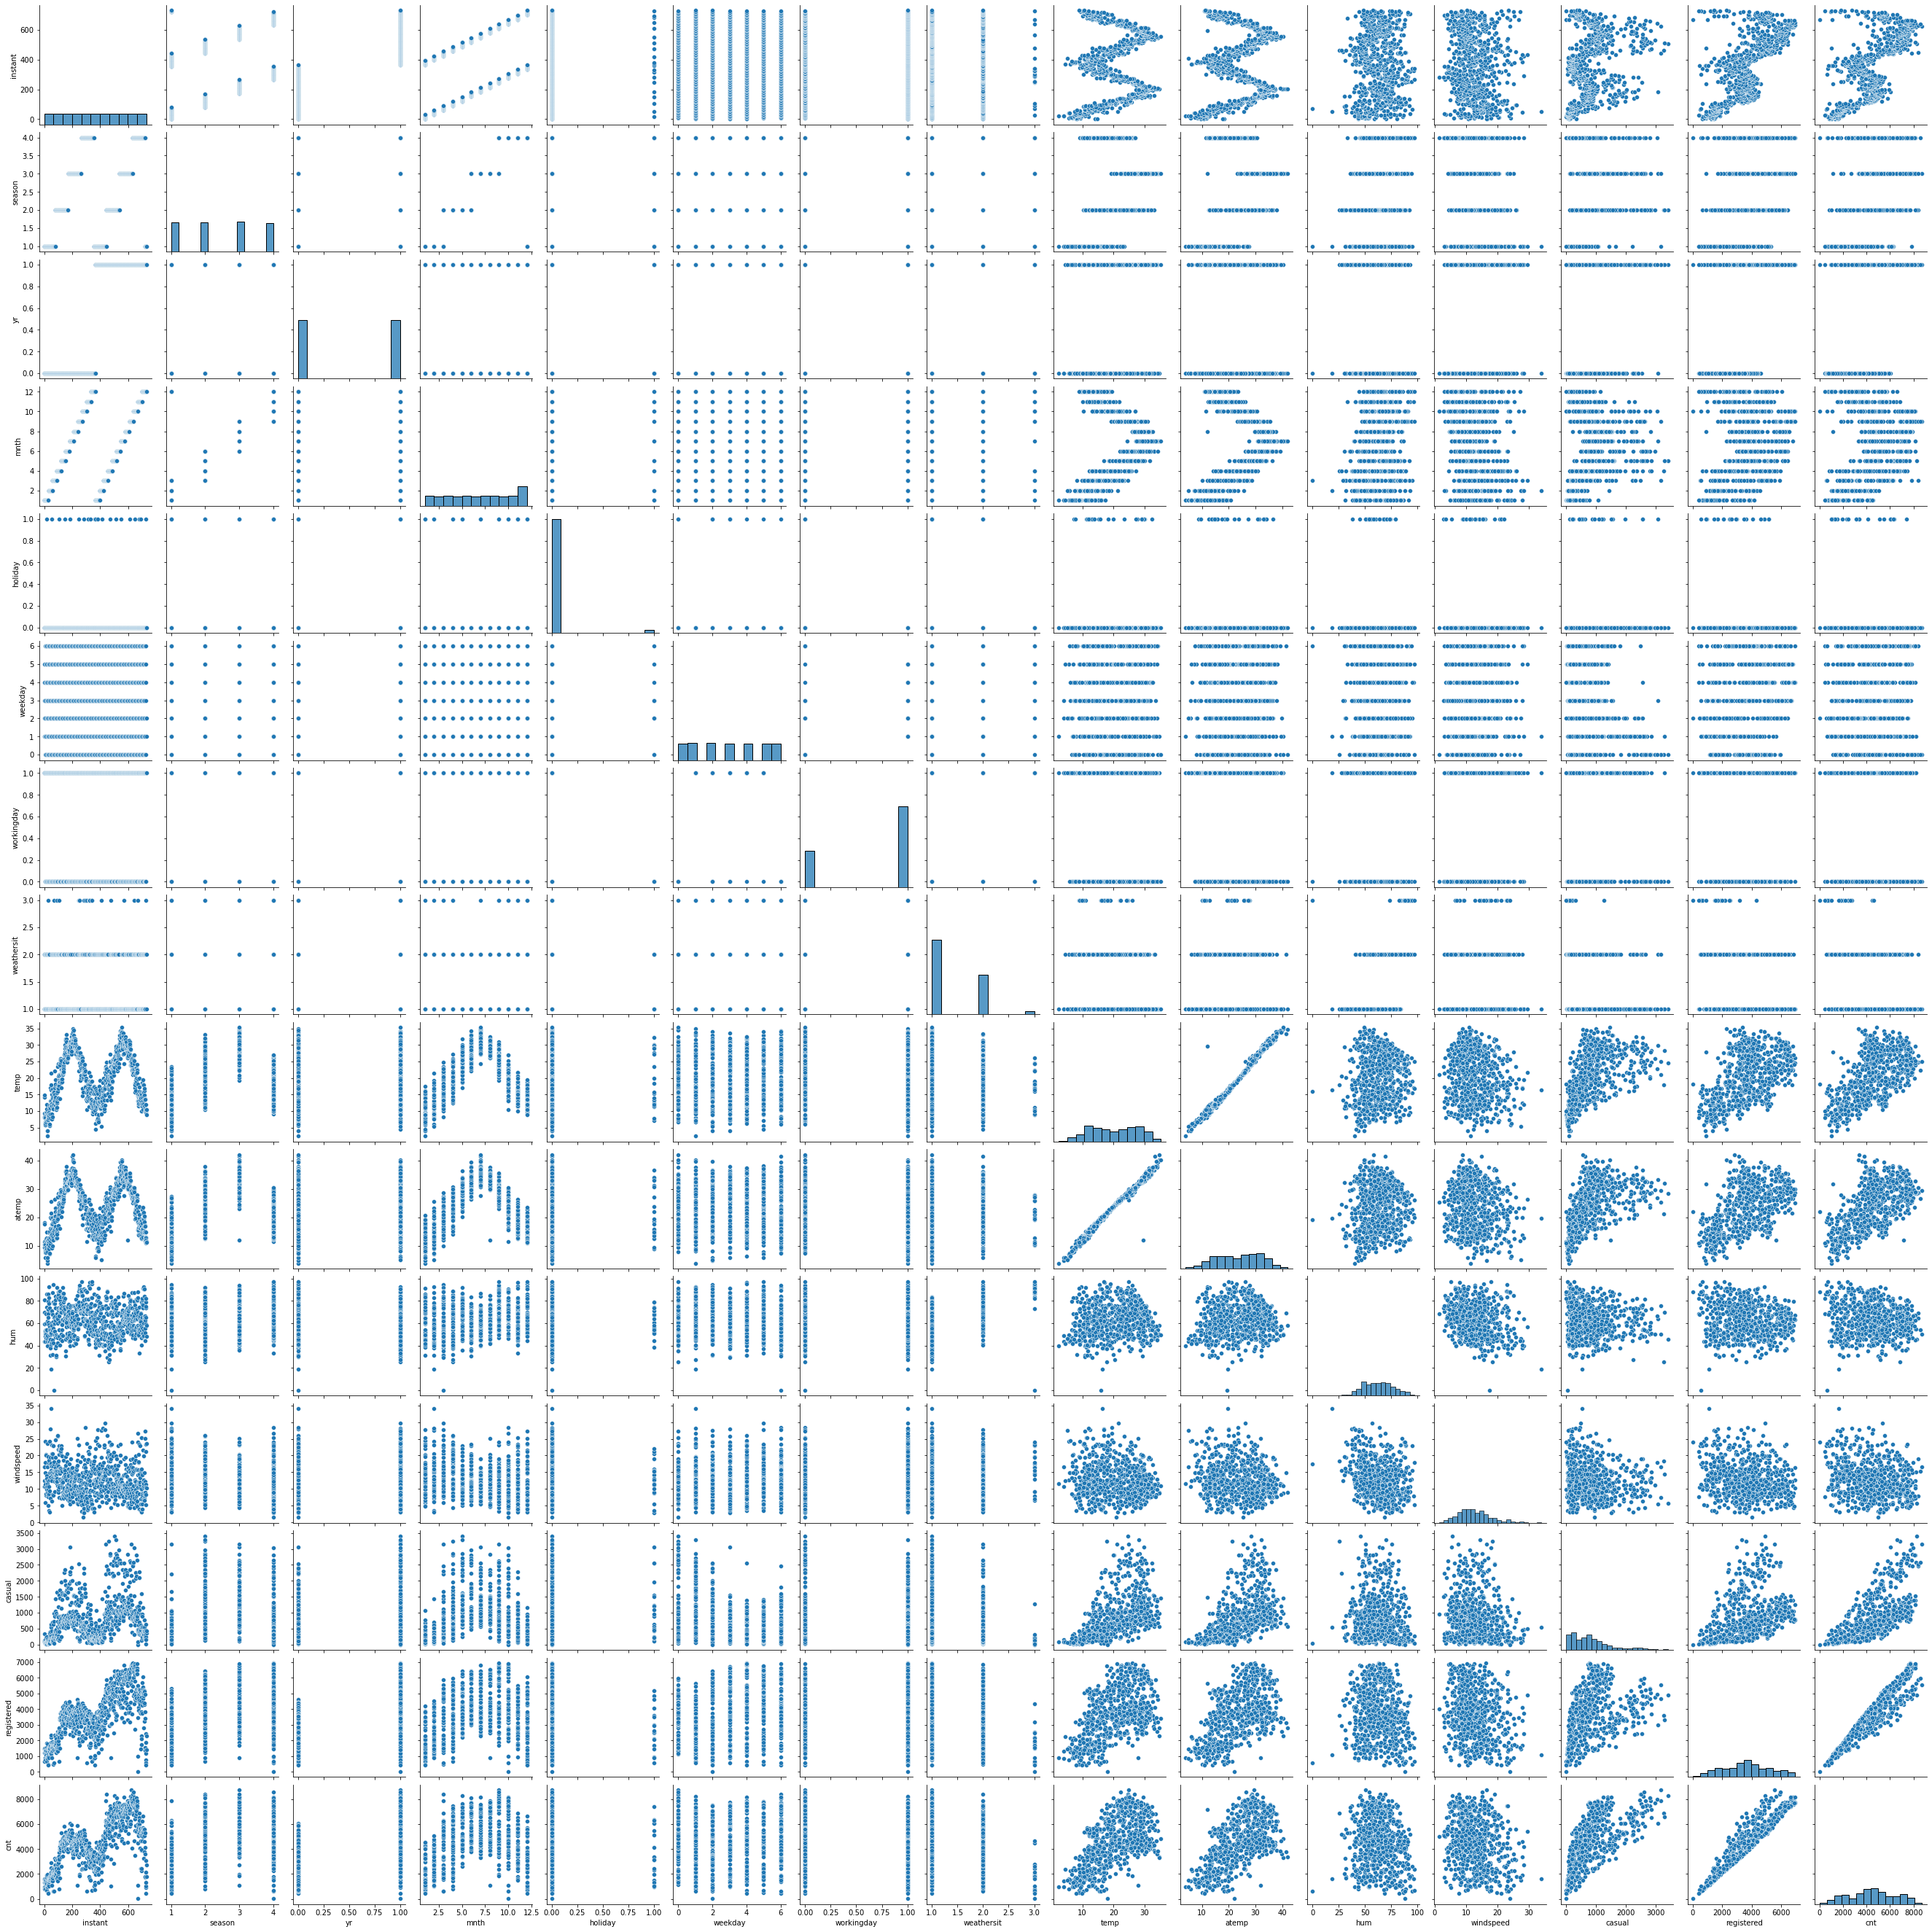

In [317]:
# validating first assumption: x and y variables have a linear relationship
plt.figure(figsize=(15,15))
sns.pairplot(bikes)

**We can see from above the above pairplot that all the other variables(independent variables) are having a linear relationship with the target variable cnt. This validates the first assumption that x and y variables have a linear relationship**

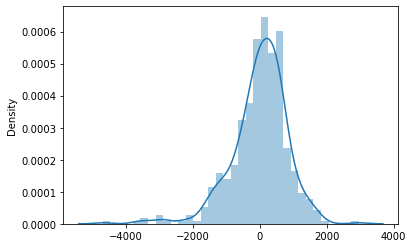

In [252]:
#validating the 2nd assumption that errors or residuals follow a normal distribution.

#making predictions on training set
ytrain_pred= bikelm_manual3.predict(xtrain_manual3)

#calculating residuals
res= ytrain-ytrain_pred

#plotting a distplot for residuals to check whether they are following normal distribution or not
sns.distplot(res)
plt.show()


**As we can see above, the residuals are following normal distribution. So the second assumption of Linear Regression is validated**

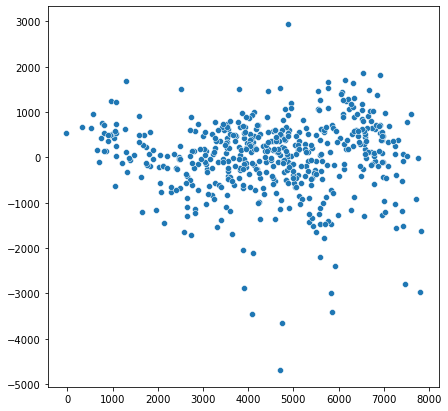

In [253]:
#plotting scatterplot for residuals to check whether they are independent of each other and whether they are having
#constant variance or not

plt.figure(figsize=(7,7))
sns.scatterplot(x= ytrain_pred, y=res)
plt.show()

**There doesn't seem to be any clear trend from the above scatterplot. So the assumption that residuals are independent is validated**

## Step 5: Model Evaluation and predicting on the test set

In [258]:
num_vars= ['temp', 'hum', 'windspeed']
dftest[num_vars]= scaler.transform(dftest[num_vars])
dftest.head()

yr  holiday  workingday      temp       hum  windspeed   cnt  fall  \
310   0        0           1  0.390094  0.781880   0.071811  4035     0   
320   0        0           0  0.320391  0.593387   0.583358  3053     0   
189   0        0           1  0.832275  0.627737   0.299998  5336     1   
382   1        0           1  0.270290  0.456848   0.810267  3376     0   
388   1        0           1  0.321479  0.861313   0.208991  4339     0   

     spring  summer  ...  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
310       0       0  ...       0       0         0       0         0        0   
320       0       0  ...       0       0         1       0         0        0   
189       0       0  ...       0       1         0       0         0        0   
382       1       0  ...       1       0         0       0         0        0   
388       1       0  ...       0       0         0       0         1        0   

     Wednesday  Clear, Few clouds, Partly cloudy, Partly cloudy  \
310          1                                                1   
320          0                                                0   
189          0                                                1   
382          0                                                1   
388          0                                                1   

     Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  \
310                                                  0                                         
320                                                  0                                         
189                                                  0                                         
382                                                  0                                         
388                                                  0                                         

     Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
310                                                  0             
320                                                  1             
189                                                  0             
382                                                  0             
388                                                  0             

[5 rows x 33 columns]

In [259]:
#splitting to xtest and ytest
ytest= dftest.pop('cnt')
xtest= dftest

In [262]:
xtest_sm= sm.add_constant(xtest) #adding constant
xtest_sm

const  yr  holiday  workingday      temp       hum  windspeed  fall  \
310    1.0   0        0           1  0.390094  0.781880   0.071811     0   
320    1.0   0        0           0  0.320391  0.593387   0.583358     0   
189    1.0   0        0           1  0.832275  0.627737   0.299998     1   
382    1.0   1        0           1  0.270290  0.456848   0.810267     0   
388    1.0   1        0           1  0.321479  0.861313   0.208991     0   
..     ...  ..      ...         ...       ...       ...        ...   ...   
657    1.0   1        0           0  0.506630  0.590382   0.196147     0   
606    1.0   1        0           1  0.797424  0.608416   0.112818     1   
417    1.0   1        0           1  0.391182  0.585230   0.437213     0   
460    1.0   1        0           0  0.400984  0.388578   0.573104     0   
544    1.0   1        0           0  0.964059  0.503649   0.294854     1   

     spring  summer  ...  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
310       0       0  ...       0       0         0       0         0        0   
320       0       0  ...       0       0         1       0         0        0   
189       0       0  ...       0       1         0       0         0        0   
382       1       0  ...       1       0         0       0         0        0   
388       1       0  ...       0       0         0       0         1        0   
..      ...     ...  ...     ...     ...       ...     ...       ...      ...   
657       0       0  ...       0       0         0       1         0        0   
606       0       0  ...       1       0         0       0         0        0   
417       1       0  ...       1       0         0       0         0        0   
460       0       1  ...       0       0         1       0         0        0   
544       0       0  ...       0       0         1       0         0        0   

     Wednesday  Clear, Few clouds, Partly cloudy, Partly cloudy  \
310          1                                                1   
320          0                                                0   
189          0                                                1   
382          0                                                1   
388          0                                                1   
..         ...                                              ...   
657          0                                                1   
606          0                                                1   
417          0                                                1   
460          0                                                1   
544          0                                                1   

     Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  \
310                                                  0                                         
320                                                  0                                         
189                                                  0                                         
382                                                  0                                         
388                                                  0                                         
..                                                 ...                                         
657                                                  0                                         
606                                                  0                                         
417                                                  0                                         
460                                                  0                                         
544                                                  0                                         

     Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
310                                                  0             
320                      

In [263]:
#selected predictors for our model
xtrain_manual3.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'April',
       'December', 'March', 'May', 'November', 'September'],
      dtype='object')

In [272]:
#subsetting all the selected predictors for the model in the xtest
xtest_sm= xtest_sm[['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'April',
       'December', 'March', 'May', 'November', 'September']]
xtest_sm.head()

const  yr      temp       hum  windspeed  spring  winter  April  \
310    1.0   0  0.390094  0.781880   0.071811       0       1      0   
320    1.0   0  0.320391  0.593387   0.583358       0       1      0   
189    1.0   0  0.832275  0.627737   0.299998       0       0      0   
382    1.0   1  0.270290  0.456848   0.810267       1       0      0   
388    1.0   1  0.321479  0.861313   0.208991       1       0      0   

     December  March  May  November  September  
310         0      0    0         1          0  
320         0      0    0         1          0  
189         0      0    0         0          0  
382         0      0    0         0          0  
388         0      0    0         0          0

In [273]:
#prediciting on the test set
ytest_pred= bikelm_manual3.predict(xtest_sm)
ytest_pred.head()

310    3581.009014
320    2964.397195
189    4752.723995
382    3286.566556
388    3322.588347
dtype: float64

In [274]:
#r2 score
from sklearn.metrics import r2_score

r2= r2_score(y_true=ytest, y_pred=ytest_pred)
r2

0.8237339504846017

**Conclusion: We are getting a r2 score of 82% on the test set**

### Top 3 features

In [292]:
coefficients= pd.DataFrame(bikelm_manual3.params) #created a dataframe that stores our model's coefficients for all predictors

In [293]:
pvalues= pd.DataFrame(bikelm_manual3.pvalues) #created a dataframe that stores our model's pvalues for all predictors

In [313]:
#creating dataframe thant will sort the features by their importance i.e. their coefficients
top3_features= pd.concat([coefficients, pvalues], axis=1)
top3_features.columns= ['coefs', 'pvalues']
top3_features= top3_features.sort_values(by='coefs', ascending=False)
top3_features

coefs       pvalues
temp       4089.863659  2.236817e-36
const      3815.805189  2.503533e-30
yr         1978.412291  9.572624e-95
winter     1097.585083  8.236758e-13
September   795.388497  9.257255e-07
May         700.600135  2.867085e-06
April       348.126383  4.666728e-02
March       341.884408  1.895264e-02
November   -393.066924  3.046792e-02
December   -469.226860  4.043977e-03
spring     -762.683901  1.727644e-05
windspeed -1782.333102  5.015876e-12
hum       -3078.160807  9.916534e-25

In [315]:
#top 3 features
top3_features= top3_features.drop('const', axis= 0)
top3_features[0:3]

coefs       pvalues
temp    4089.863659  2.236817e-36
yr      1978.412291  9.572624e-95
winter  1097.585083  8.236758e-13

**So we can conclude that the top 3 features from four final model are temp, yr and winter**